# Evapotranspiration and Precipitation across 6 AZMET Sites

In [2]:
library(dplyr)
library(tidyverse)
library(ggplot2)
library(glmnet)
library(corrplot)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.3     v readr   1.3.1
v tibble  3.0.4     v purrr   0.3.2
v tidyr   1.1.3     v stringr 1.4.0
v ggplot2 3.3.3     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()

In [3]:
aguila87 = read.table("Data/UAZ/aguila/0787rd.txt", sep = ",")
aguila88 = read.table("Data/UAZ/aguila/0788rd.txt", sep = ",")
aguila89 = read.table("Data/UAZ/aguila/0789rd.txt", sep = ",")
aguila90 = read.table("Data/UAZ/aguila/0790rd.txt", sep = ",")
aguila91 = read.table("Data/UAZ/aguila/0791rd.txt", sep = ",")
aguila92 = read.table("Data/UAZ/aguila/0792rd.txt", sep = ",")
aguila93 = read.table("Data/UAZ/aguila/0793rd.txt", sep = ",")
aguila94 = read.table("Data/UAZ/aguila/0794rd.txt", sep = ",")
aguila95 = read.table("Data/UAZ/aguila/0795rd.txt", sep = ",")
aguila96 = read.table("Data/UAZ/aguila/0796rd.txt", sep = ",")
aguila97 = read.table("Data/UAZ/aguila/0797rd.txt", sep = ",")
aguila98 = read.table("Data/UAZ/aguila/0798rd.txt", sep = ",")
aguila99 = read.table("Data/UAZ/aguila/0799rd.txt", sep = ",")
aguila00 = read.table("Data/UAZ/aguila/0700rd.txt", sep = ",")
aguila01 = read.table("Data/UAZ/aguila/0701rd.txt", sep = ",")
aguila02 = read.table("Data/UAZ/aguila/0702rd.txt", sep = ",")
aguila03 = read.table("Data/UAZ/aguila/0703rd.txt", sep = ",")
aguila04 = read.table("Data/UAZ/aguila/0704rd.txt", sep = ",")
aguila05 = read.table("Data/UAZ/aguila/0705rd.txt", sep = ",")
aguila06 = read.table("Data/UAZ/aguila/0706rd.txt", sep = ",")
aguila07 = read.table("Data/UAZ/aguila/0707rd.txt", sep = ",")
aguila08 = read.table("Data/UAZ/aguila/0708rd.txt", sep = ",")
aguila09 = read.table("Data/UAZ/aguila/0709rd.txt", sep = ",")
aguila10 = read.table("Data/UAZ/aguila/0710rd.txt", sep = ",")
aguila11 = read.table("Data/UAZ/aguila/0711rd.txt", sep = ",")
aguila12 = read.table("Data/UAZ/aguila/0712rd.txt", sep = ",")
aguila13 = read.table("Data/UAZ/aguila/0713rd.txt", sep = ",")
aguila14 = read.table("Data/UAZ/aguila/0714rd.txt", sep = ",")
aguila15 = read.table("Data/UAZ/aguila/0715rd.txt", sep = ",")
aguila16 = read.table("Data/UAZ/aguila/0716rd.txt", sep = ",")
aguila17 = read.table("Data/UAZ/aguila/0717rd.txt", sep = ",")
aguila18 = read.table("Data/UAZ/aguila/0718rd.txt", sep = ",")
aguila19 = read.table("Data/UAZ/aguila/0719rd.txt", sep = ",")
aguila20 = read.table("Data/UAZ/aguila/0720rd.txt", sep = ",")
aguila21 = read.table("Data/UAZ/aguila/0721rd.txt", sep = ",")

aguila = bind_rows(aguila87,aguila88,aguila89,aguila90,aguila91,aguila92,aguila93,aguila94,aguila95,
                   aguila96,aguila97,aguila98,aguila99,aguila00,aguila01,aguila02,aguila03,aguila04,
                   aguila05,aguila06,aguila07,aguila08,aguila09,aguila10,aguila11,aguila12,aguila13,
                   aguila14,aguila15,aguila16,aguila17,aguila18,aguila19,aguila20,aguila21)

X = c('V1','V2','V12','V25')
headers = c('Year','Day','Precipitation','ETo')
aguila = aguila[X]
colnames(aguila) = headers
aguila = aguila %>% filter(Year>=87&Precipitation!=999&ETo!=999) %>% mutate(Accumulation = Precipitation-ETo)
aguila_ann = aguila %>% group_by(Year) %>% summarise(Precipitation = sum(Precipitation), ETo = sum(ETo))

`summarise()` ungrouping output (override with `.groups` argument)


In [4]:
payson03 = read.table("Data/UAZ/payson/3203rd.txt", sep = ",")
payson04 = read.table("Data/UAZ/payson/3204rd.txt", sep = ",")
payson05 = read.table("Data/UAZ/payson/3205rd.txt", sep = ",")
payson06 = read.table("Data/UAZ/payson/3206rd.txt", sep = ",")
payson07 = read.table("Data/UAZ/payson/3207rd.txt", sep = ",")
payson08 = read.table("Data/UAZ/payson/3208rd.txt", sep = ",")
payson09 = read.table("Data/UAZ/payson/3209rd.txt", sep = ",")
payson10 = read.table("Data/UAZ/payson/3210rd.txt", sep = ",")
payson11 = read.table("Data/UAZ/payson/3211rd.txt", sep = ",")
payson12 = read.table("Data/UAZ/payson/3212rd.txt", sep = ",")
payson13 = read.table("Data/UAZ/payson/3213rd.txt", sep = ",")
payson14 = read.table("Data/UAZ/payson/3214rd.txt", sep = ",")
payson15 = read.table("Data/UAZ/payson/3215rd.txt", sep = ",")
payson16 = read.table("Data/UAZ/payson/3216rd.txt", sep = ",")
payson17 = read.table("Data/UAZ/payson/3217rd.txt", sep = ",")
payson18 = read.table("Data/UAZ/payson/3218rd.txt", sep = ",")
payson19 = read.table("Data/UAZ/payson/3219rd.txt", sep = ",")
payson20 = read.table("Data/UAZ/payson/3220rd.txt", sep = ",")
payson21 = read.table("Data/UAZ/payson/3221rd.txt", sep = ",")

payson = bind_rows(payson03,payson04,payson05,payson06,payson07,payson08,payson09,payson10,payson11,
                   payson12,payson13,payson14,payson15,payson16,payson17,payson18,payson19,payson20,
                   payson21)

payson = payson[X]
colnames(payson) = headers
payson = payson %>% filter(Year>=2003&Precipitation!=999&ETo!=999) %>% mutate(Accumulation = Precipitation-ETo)
payson_ann = payson %>% group_by(Year) %>% summarise(Precipitation = sum(Precipitation), ETo = sum(ETo))

`summarise()` ungrouping output (override with `.groups` argument)


In [5]:
phoenix87 = read.table("Data/UAZ/phoenix-greenway/1287rd.txt", sep = ",")
phoenix88 = read.table("Data/UAZ/phoenix-greenway/1288rd.txt", sep = ",")
phoenix89 = read.table("Data/UAZ/phoenix-greenway/1289rd.txt", sep = ",")
phoenix90 = read.table("Data/UAZ/phoenix-greenway/1290rd.txt", sep = ",")
phoenix91 = read.table("Data/UAZ/phoenix-greenway/1291rd.txt", sep = ",")
phoenix92 = read.table("Data/UAZ/phoenix-greenway/1292rd.txt", sep = ",")
phoenix93 = read.table("Data/UAZ/phoenix-greenway/1293rd.txt", sep = ",")
phoenix94 = read.table("Data/UAZ/phoenix-greenway/1294rd.txt", sep = ",")
phoenix95 = read.table("Data/UAZ/phoenix-greenway/1295rd.txt", sep = ",")
phoenix96 = read.table("Data/UAZ/phoenix-greenway/1296rd.txt", sep = ",")
phoenix97 = read.table("Data/UAZ/phoenix-greenway/1297rd.txt", sep = ",")
phoenix98 = read.table("Data/UAZ/phoenix-greenway/1298rd.txt", sep = ",")
phoenix99 = read.table("Data/UAZ/phoenix-greenway/1299rd.txt", sep = ",")
phoenix00 = read.table("Data/UAZ/phoenix-greenway/1200rd.txt", sep = ",")
phoenix01 = read.table("Data/UAZ/phoenix-greenway/1201rd.txt", sep = ",")
phoenix02 = read.table("Data/UAZ/phoenix-greenway/1202rd.txt", sep = ",")
phoenix03 = read.table("Data/UAZ/phoenix-greenway/1203rd.txt", sep = ",")
phoenix04 = read.table("Data/UAZ/phoenix-greenway/1204rd.txt", sep = ",")
phoenix05 = read.table("Data/UAZ/phoenix-greenway/1205rd.txt", sep = ",")
phoenix06 = read.table("Data/UAZ/phoenix-greenway/1206rd.txt", sep = ",")
phoenix07 = read.table("Data/UAZ/phoenix-greenway/1207rd.txt", sep = ",")
phoenix08 = read.table("Data/UAZ/phoenix-greenway/1208rd.txt", sep = ",")
phoenix09 = read.table("Data/UAZ/phoenix-greenway/1209rd.txt", sep = ",")
phoenix10 = read.table("Data/UAZ/phoenix-greenway/1210rd.txt", sep = ",")
phoenix11 = read.table("Data/UAZ/phoenix-greenway/1211rd.txt", sep = ",")
phoenix12 = read.table("Data/UAZ/phoenix-greenway/1212rd.txt", sep = ",")
phoenix13 = read.table("Data/UAZ/phoenix-greenway/1213rd.txt", sep = ",")
phoenix14 = read.table("Data/UAZ/phoenix-greenway/1214rd.txt", sep = ",")
phoenix15 = read.table("Data/UAZ/phoenix-greenway/1215rd.txt", sep = ",")
phoenix16 = read.table("Data/UAZ/phoenix-greenway/1216rd.txt", sep = ",")
phoenix17 = read.table("Data/UAZ/phoenix-greenway/1217rd.txt", sep = ",")
phoenix18 = read.table("Data/UAZ/phoenix-greenway/1218rd.txt", sep = ",")
phoenix19 = read.table("Data/UAZ/phoenix-greenway/1219rd.txt", sep = ",")
phoenix20 = read.table("Data/UAZ/phoenix-greenway/1220rd.txt", sep = ",")
phoenix21 = read.table("Data/UAZ/phoenix-greenway/1221rd.txt", sep = ",")

phoenix = bind_rows(phoenix87,phoenix88,phoenix89,phoenix90,phoenix91,phoenix92,phoenix93,phoenix94,phoenix95,
                   phoenix96,phoenix97,phoenix98,phoenix99,phoenix00,phoenix01,phoenix02,phoenix03,phoenix04,
                   phoenix05,phoenix06,phoenix07,phoenix08,phoenix09,phoenix10,phoenix11,phoenix12,phoenix13,
                   phoenix14,phoenix15,phoenix16,phoenix17,phoenix18,phoenix19,phoenix20,phoenix21)

phoenix = phoenix[X]
colnames(phoenix) = headers
phoenix = phoenix %>% filter(Year>=87&Precipitation!=999&ETo!=999) %>% mutate(Accumulation = Precipitation-ETo)
phoenix_ann = phoenix %>% group_by(Year) %>% summarise(Precipitation = sum(Precipitation), ETo = sum(ETo))

`summarise()` ungrouping output (override with `.groups` argument)


In [6]:
sahuarita13 = read.table("Data/UAZ/sahuarita/3813rd.txt", sep = ",")
sahuarita14 = read.table("Data/UAZ/sahuarita/3814rd.txt", sep = ",")
sahuarita15 = read.table("Data/UAZ/sahuarita/3815rd.txt", sep = ",")
sahuarita16 = read.table("Data/UAZ/sahuarita/3816rd.txt", sep = ",")
sahuarita17 = read.table("Data/UAZ/sahuarita/3817rd.txt", sep = ",")
sahuarita18 = read.table("Data/UAZ/sahuarita/3818rd.txt", sep = ",")
sahuarita19 = read.table("Data/UAZ/sahuarita/3819rd.txt", sep = ",")
sahuarita20 = read.table("Data/UAZ/sahuarita/3820rd.txt", sep = ",")
sahuarita21 = read.table("Data/UAZ/sahuarita/3821rd.txt", sep = ",")

sahuarita = bind_rows(sahuarita13,sahuarita14,sahuarita15,sahuarita16,sahuarita17,sahuarita18,sahuarita19,
                      sahuarita20,sahuarita21)

sahuarita = sahuarita[X]
colnames(sahuarita) = headers
sahuarita = sahuarita %>% filter(Year>=2013&Precipitation!=999&ETo!=999) %>% mutate(Accumulation = Precipitation-ETo)
sahuarita_ann = sahuarita %>% group_by(Year) %>% summarise(Precipitation = sum(Precipitation), ETo = sum(ETo))

`summarise()` ungrouping output (override with `.groups` argument)


In [7]:
sansimon11 = read.table("Data/UAZ/san-simon/3711rd.txt", sep = ",")
sansimon12 = read.table("Data/UAZ/san-simon/3712rd.txt", sep = ",")
sansimon13 = read.table("Data/UAZ/san-simon/3713rd.txt", sep = ",")
sansimon14 = read.table("Data/UAZ/san-simon/3714rd.txt", sep = ",")
sansimon15 = read.table("Data/UAZ/san-simon/3715rd.txt", sep = ",")
sansimon16 = read.table("Data/UAZ/san-simon/3716rd.txt", sep = ",")
sansimon17 = read.table("Data/UAZ/san-simon/3717rd.txt", sep = ",")
sansimon18 = read.table("Data/UAZ/san-simon/3718rd.txt", sep = ",")
sansimon19 = read.table("Data/UAZ/san-simon/3719rd.txt", sep = ",")
sansimon20 = read.table("Data/UAZ/san-simon/3720rd.txt", sep = ",")
sansimon21 = read.table("Data/UAZ/san-simon/3721rd.txt", sep = ",")

sansimon = bind_rows(sansimon11,sansimon12,sansimon13,sansimon14,sansimon15,sansimon16,sansimon17,sansimon18,
                     sansimon19,sansimon20,sansimon21)

sansimon = sansimon[X]
colnames(sansimon) = headers
sansimon = sansimon %>% filter(Year>=2011&Precipitation!=999&ETo!=999) %>% mutate(Accumulation = Precipitation-ETo)
sansimon_ann = sansimon %>% group_by(Year) %>% summarise(Precipitation = sum(Precipitation), ETo = sum(ETo))

`summarise()` ungrouping output (override with `.groups` argument)


In [8]:
yuma09 = read.table("Data/UAZ/yuma-south/3609rd.txt", sep = ",")
yuma10 = read.table("Data/UAZ/yuma-south/3610rd.txt", sep = ",")
yuma11 = read.table("Data/UAZ/yuma-south/3611rd.txt", sep = ",")
yuma12 = read.table("Data/UAZ/yuma-south/3612rd.txt", sep = ",")
yuma13 = read.table("Data/UAZ/yuma-south/3613rd.txt", sep = ",")
yuma14 = read.table("Data/UAZ/yuma-south/3614rd.txt", sep = ",")
yuma15 = read.table("Data/UAZ/yuma-south/3615rd.txt", sep = ",")
yuma16 = read.table("Data/UAZ/yuma-south/3616rd.txt", sep = ",")
yuma17 = read.table("Data/UAZ/yuma-south/3617rd.txt", sep = ",")
yuma18 = read.table("Data/UAZ/yuma-south/3618rd.txt", sep = ",")
yuma19 = read.table("Data/UAZ/yuma-south/3619rd.txt", sep = ",")
yuma20 = read.table("Data/UAZ/yuma-south/3620rd.txt", sep = ",")
yuma21 = read.table("Data/UAZ/yuma-south/3621rd.txt", sep = ",")

yuma = bind_rows(yuma09,yuma10,yuma11,yuma12,yuma13,yuma14,yuma15,yuma16,yuma17,yuma18,yuma19,yuma20,yuma21)

yuma = yuma[X]
colnames(yuma) = headers
yuma = yuma %>% filter(Year>=2009&Precipitation!=999&ETo!=999) %>% mutate(Accumulation = Precipitation-ETo)
yuma_ann = yuma %>% group_by(Year) %>% summarise(Precipitation = sum(Precipitation), ETo = sum(ETo))

`summarise()` ungrouping output (override with `.groups` argument)


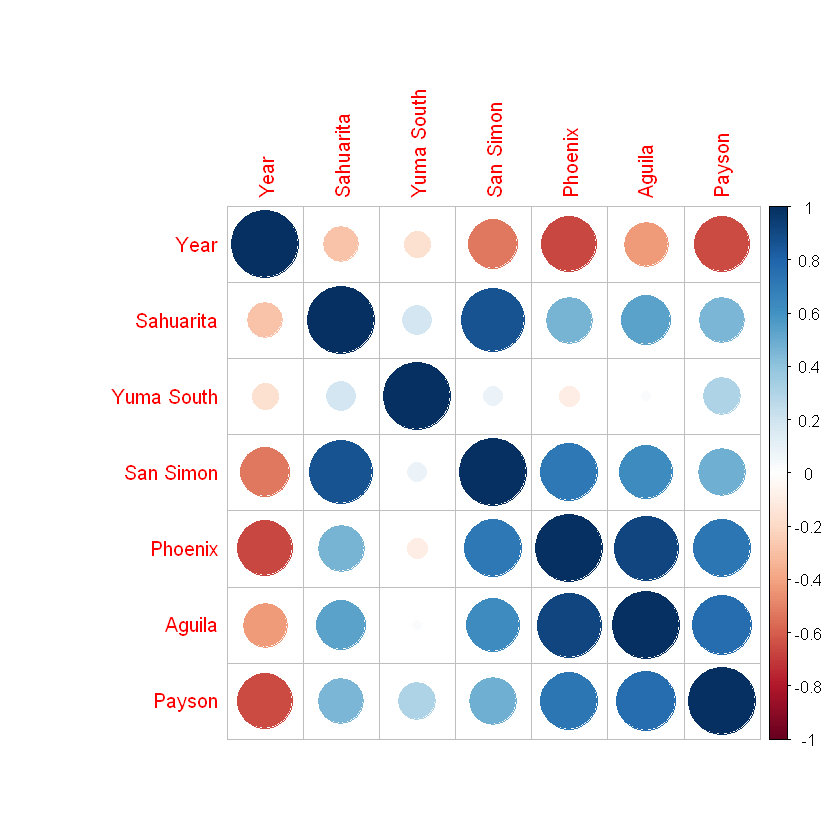

In [14]:
precip = sahuarita_ann[,1:2]
precip = precip %>% left_join(yuma_ann[,1:2],by='Year') %>% left_join(sansimon_ann[,1:2],by='Year') %>% 
    left_join(phoenix_ann[,1:2],by='Year') %>% left_join(aguila_ann[,1:2],by='Year') %>% left_join(payson_ann[,1:2],by='Year')

names(precip) = c('Year','Sahuarita','Yuma South','San Simon','Phoenix','Aguila','Payson')
corrplot(cor(precip))
 

In [15]:
cor(precip)

,Year,Sahuarita,Yuma South,San Simon,Phoenix,Aguila,Payson
Year,1.0000000,-0.2805869,-0.16121404,-0.52448851,-0.66350920,-0.42778560,-0.6576766
Sahuarita,-0.2805869,1.0000000,0.18936821,0.86742245,0.46150516,0.53799327,0.4589403
Yuma South,-0.1612140,0.1893682,1.00000000,0.08389006,-0.09143573,0.02130607,0.3031846
San Simon,-0.5244885,0.8674224,0.08389006,1.00000000,0.71070785,0.62100986,0.4832203
Phoenix,-0.6635092,0.4615052,-0.09143573,0.71070785,1.00000000,0.91124009,0.7274229
Aguila,-0.4277856,0.5379933,0.02130607,0.62100986,0.91124009,1.00000000,0.7657318
Payson,-0.6576766,0.4589403,0.30318459,0.48322034,0.72742287,0.76573177,1.0000000
